In [1]:
!pip install yfinance pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [5]:
import yfinance as yf
import pandas as pd

# Downloading Reliance data
reliance_data = yf.download("RELIANCE.BO", start="2020-01-01", end="2024-12-01")

# Displaying first few rows
reliance_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.BO,RELIANCE.BO,RELIANCE.BO,RELIANCE.BO,RELIANCE.BO,RELIANCE.BO
Date,,,,,,
2020-01-01 00:00:00+00:00,729.747864,754.849976,763.700012,752.674988,758.049988,913648
2020-01-02 00:00:00+00:00,742.146423,767.674988,770.400024,756.500000,757.000000,1452578
2020-01-03 00:00:00+00:00,743.064819,768.625000,770.650024,761.700012,767.200012,708174
2020-01-06 00:00:00+00:00,725.784241,750.750000,764.000000,748.750000,763.500000,906262
2020-01-07 00:00:00+00:00,737.167725,762.525024,767.000000,757.224976,760.000000,1008480


In [7]:
# Basic information about the dataset
print(reliance_data.info())

# Summary statistics for each column
print(reliance_data.describe())

# Check for missing values
print(reliance_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1215 entries, 2020-01-01 00:00:00+00:00 to 2024-11-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, RELIANCE.BO)  1215 non-null   float64
 1   (Close, RELIANCE.BO)      1215 non-null   float64
 2   (High, RELIANCE.BO)       1215 non-null   float64
 3   (Low, RELIANCE.BO)        1215 non-null   float64
 4   (Open, RELIANCE.BO)       1215 non-null   float64
 5   (Volume, RELIANCE.BO)     1215 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 66.4 KB
None
Price     Adj Close        Close         High          Low         Open  \
Ticker  RELIANCE.BO  RELIANCE.BO  RELIANCE.BO  RELIANCE.BO  RELIANCE.BO   
count   1215.000000  1215.000000  1215.000000  1215.000000  1215.000000   
mean    1153.597930  1172.284979  1185.243228  1160.578828  1173.550533   
std      220.779260   216.520531   216.408670   21

In [9]:
# Calculate Moving Averages
reliance_data['50-Day MA'] = reliance_data['Adj Close'].rolling(window=50).mean()
reliance_data['200-Day MA'] = reliance_data['Adj Close'].rolling(window=200).mean()

# Display data with new columns
print(reliance_data[['Adj Close', '50-Day MA', '200-Day MA']].head())


Price                       Adj Close 50-Day MA 200-Day MA
Ticker                    RELIANCE.BO                     
Date                                                      
2020-01-01 00:00:00+00:00  729.747864       NaN        NaN
2020-01-02 00:00:00+00:00  742.146423       NaN        NaN
2020-01-03 00:00:00+00:00  743.064819       NaN        NaN
2020-01-06 00:00:00+00:00  725.784241       NaN        NaN
2020-01-07 00:00:00+00:00  737.167725       NaN        NaN


In [11]:
# Calculate Moving Averages
reliance_data['50-Day MA'] = reliance_data['Adj Close'].rolling(window=50, min_periods=50).mean()
reliance_data['200-Day MA'] = reliance_data['Adj Close'].rolling(window=200, min_periods=200).mean()

# Drop rows where 50-Day MA or 200-Day MA is NaN
reliance_data_clean = reliance_data.dropna(subset=['50-Day MA', '200-Day MA'])

# Display the first few rows with valid moving averages
print(reliance_data_clean[['Adj Close', '50-Day MA', '200-Day MA']].head())


KeyError: ['50-Day MA', '200-Day MA']

In [13]:
print(reliance_data.columns)


MultiIndex([( 'Adj Close', 'RELIANCE.BO'),
            (     'Close', 'RELIANCE.BO'),
            (      'High', 'RELIANCE.BO'),
            (       'Low', 'RELIANCE.BO'),
            (      'Open', 'RELIANCE.BO'),
            (    'Volume', 'RELIANCE.BO'),
            ( '50-Day MA',            ''),
            ('200-Day MA',            '')],
           names=['Price', 'Ticker'])


In [15]:
# Define MultiIndex column for 'Adj Close'
adj_close_col = ('Adj Close', 'RELIANCE.BO')

# Recalculate Moving Averages in case they were not computed
reliance_data[('50-Day MA', '')] = reliance_data[adj_close_col].rolling(window=50, min_periods=50).mean()
reliance_data[('200-Day MA', '')] = reliance_data[adj_close_col].rolling(window=200, min_periods=200).mean()

# Drop rows where Moving Averages are NaN
reliance_data_clean = reliance_data.dropna(subset=[('50-Day MA', ''), ('200-Day MA', '')])

# Display the cleaned data with valid Moving Averages
print(reliance_data_clean[[adj_close_col, ('50-Day MA', ''), ('200-Day MA', '')]].head())


Price                        Adj Close    50-Day MA  200-Day MA
Ticker                     RELIANCE.BO                         
Date                                                           
2020-10-19 00:00:00+00:00  1059.648926  1063.729636  816.096493
2020-10-20 00:00:00+00:00  1049.762451  1064.079312  817.696566
2020-10-21 00:00:00+00:00  1034.056274  1063.974114  819.156115
2020-10-22 00:00:00+00:00  1026.191040  1063.774438  820.571746
2020-10-23 00:00:00+00:00  1028.845215  1063.679473  822.087051


In [17]:
# Calculate Daily Returns (if not already done)
reliance_data[('Daily Return', '')] = reliance_data[('Adj Close', 'RELIANCE.BO')].pct_change()

# Calculate Volatility - 20-day rolling standard deviation
reliance_data[('Volatility', '')] = reliance_data[('Daily Return', '')].rolling(window=20).std()

# Display data with Daily Return and Volatility
print(reliance_data[[('Daily Return', ''), ('Volatility', '')]].head())


Price                     Daily Return Volatility
Ticker                                           
Date                                             
2020-01-01 00:00:00+00:00          NaN        NaN
2020-01-02 00:00:00+00:00     0.016990        NaN
2020-01-03 00:00:00+00:00     0.001237        NaN
2020-01-06 00:00:00+00:00    -0.023256        NaN
2020-01-07 00:00:00+00:00     0.015684        NaN


In [19]:
# Display rows from the 20th row onward to see valid Volatility values
print(reliance_data[[('Daily Return', ''), ('Volatility', '')]].iloc[19:25])


Price                     Daily Return Volatility
Ticker                                           
Date                                             
2020-01-28 00:00:00+00:00    -0.023397        NaN
2020-01-29 00:00:00+00:00     0.005675   0.014938
2020-01-30 00:00:00+00:00    -0.025140   0.015251
2020-01-31 00:00:00+00:00    -0.021352   0.015748
2020-02-03 00:00:00+00:00    -0.018311   0.015469
2020-02-04 00:00:00+00:00     0.028863   0.016586


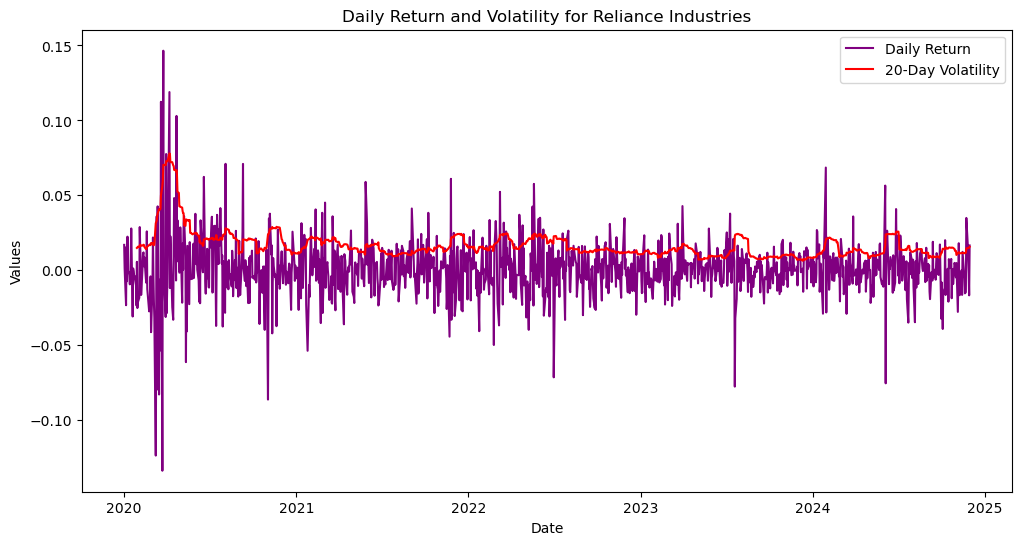

In [21]:
import matplotlib.pyplot as plt

# Plot Daily Return and Volatility
plt.figure(figsize=(12, 6))
plt.plot(reliance_data.index, reliance_data[('Daily Return', '')], label='Daily Return', color='purple')
plt.plot(reliance_data.index, reliance_data[('Volatility', '')], label='20-Day Volatility', color='red')
plt.title('Daily Return and Volatility for Reliance Industries')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


In [23]:
reliance_data.to_csv("data/reliance_processed_data.csv")


OSError: Cannot save file into a non-existent directory: 'data'